# Titanic Survival Predictions
## Titanic passanger survival predictions based on Kaggle's Titanic dataset

In [1]:
import numpy
import pandas
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
uncleaned_data_set = pandas.read_csv('./data/train.csv')

uncleaned_training_set, uncleaned_validation_set = train_test_split(uncleaned_data_set, test_size=0.2)

In [7]:
uncleaned_data_set.info() # see missing values
'''
891

 0   PassengerId  0 nulls    int64  
 1   Survived     0 nulls    int64  
 2   Pclass       0 nulls    int64  
 3   Name         0 nulls    object 
 4   Sex          0 nullsl    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
uncleaned_training_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
767,768,0,3,"Mangan, Miss. Mary",female,30.5,0,0,364850,7.7500,NaN,Q
587,588,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,1,1,13567,79.2000,B41,C
503,504,0,3,"Laitinen, Miss. Kristina Sofia",female,37.0,0,0,4135,9.5875,NaN,S
247,248,1,2,"Hamalainen, Mrs. William (Anna)",female,24.0,0,2,250649,14.5000,NaN,S
278,279,0,3,"Rice, Master. Eric",male,7.0,4,1,382652,29.1250,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
507,508,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0,0,111427,26.5500,NaN,S
780,781,1,3,"Ayoub, Miss. Banoura",female,13.0,0,0,2687,7.2292,NaN,C
83,84,0,1,"Carrau, Mr. Francisco M",male,28.0,0,0,113059,47.1000,NaN,S
227,228,0,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S


### Features
- PassengerId
    - Unlikely to be helpful
- Pclass
    - 1, 2 or 3. 
- Survived
    - Target

In [4]:
uncleaned_validation_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
657,658,0,3,"Bourke, Mrs. John (Catherine)",female,32.0,1,1,364849,15.5000,NaN,Q
81,82,1,3,"Sheerlinck, Mr. Jan Baptist",male,29.0,0,0,345779,9.5000,NaN,S
594,595,0,2,"Chapman, Mr. John Henry",male,37.0,1,0,SC/AH 29037,26.0000,NaN,S
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
461,462,0,3,"Morley, Mr. William",male,34.0,0,0,364506,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
429,430,1,3,"Pickard, Mr. Berk (Berk Trembisky)",male,32.0,0,0,SOTON/O.Q. 392078,8.0500,E10,S
565,566,0,3,"Davies, Mr. Alfred J",male,24.0,2,0,A/4 48871,24.1500,NaN,S
168,169,0,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S


In [5]:
uncleaned_training_set.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.033202,0.008320,0.036720,-0.040890,-0.017758,-0.023782
Survived,-0.033202,1.000000,-0.330116,-0.097055,-0.039281,0.068803,0.246338
Pclass,0.008320,-0.330116,1.000000,-0.380697,0.080413,0.032763,-0.547215
Age,0.036720,-0.097055,-0.380697,1.000000,-0.284419,-0.178275,0.095942
SibSp,-0.040890,-0.039281,0.080413,-0.284419,1.000000,0.407848,0.178004
Parch,-0.017758,0.068803,0.032763,-0.178275,0.407848,1.000000,0.218972
Fare,-0.023782,0.246338,-0.547215,0.095942,0.178004,0.218972,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1222d4c10>,
      dtype=object)

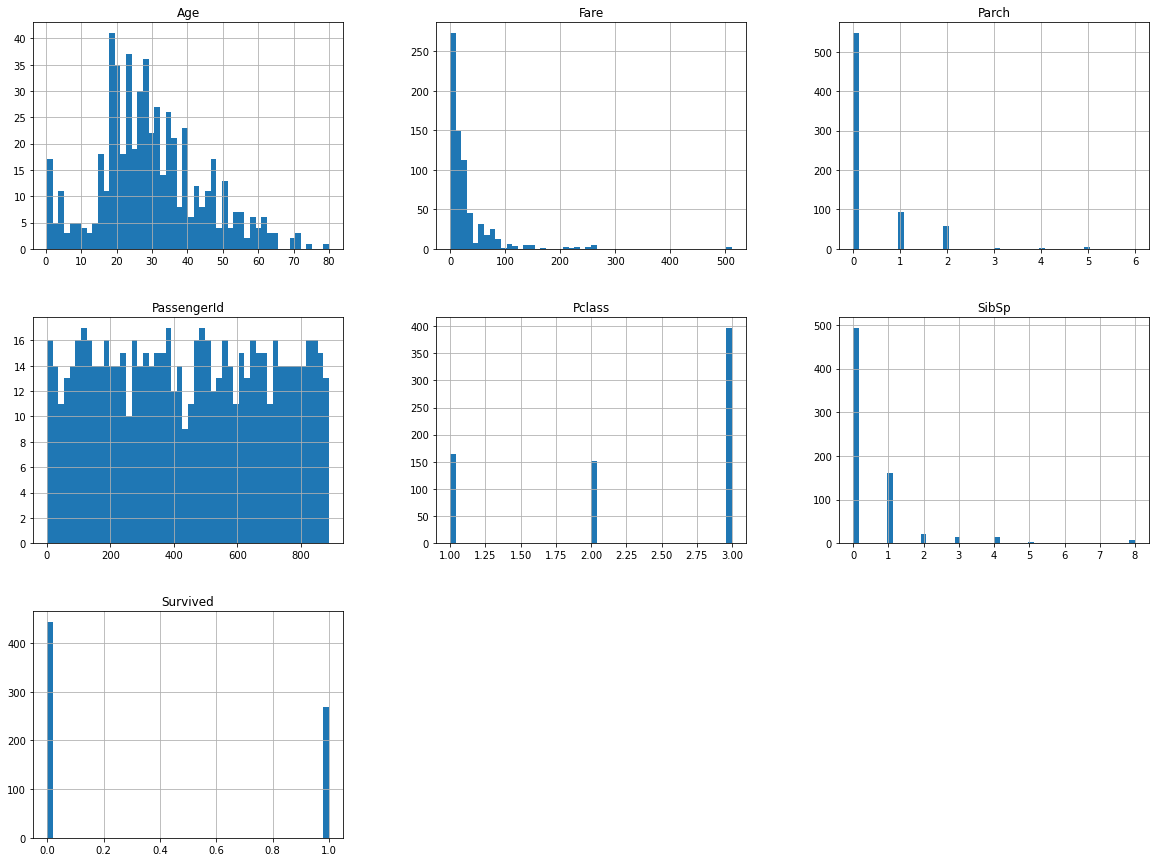

In [6]:
uncleaned_training_set.hist(bins=50, figsize=(20,15)) # plot histograms for each numeric attribute
# plt.show() # don't actually need this command because plots are displayed automatically in Jupyter

### Notes on multicolinearity
We leave out the column Embarked_C because it can be derived from columns Embarked_Q and Embarked_S. If Embarked_Q = 0 and Embarked_S = 0, then we know Embarked_C = 1. If we include a column for Embarked_C, then we will have linearly dependent columns, and there would be infinitely many sets of weight values that would give exactly the same prediction probabilities. This is called multicollinearity, and it can make the model weights less interpretable.

#### Example
If survival was 100% from Q and S, and 0% from C, the following model parameters (bias b and weights w<sub>Q</sub>, w<sub>S</sub>, and w<sub>C</sub>) would result in the same prediction probabilities:
- w<sub>Q</sub> = 1, w<sub>S</sub> = 1, w<sub>C</sub> = 0, b = 0
    - Embarked_Q = 1 => w<sub>Q</sub>(Embarked_Q) + w<sub>S</sub>(Embarked_S) + w<sub>C</sub>(Embarked_C) + b = 1
    - Embarked_S = 1 => w<sub>Q</sub>(Embarked_Q) + w<sub>S</sub>(Embarked_S) + w<sub>C</sub>(Embarked_C) + b = 1
    - Embarked_C = 1 => w<sub>Q</sub>(Embarked_Q) + w<sub>S</sub>(Embarked_S) + w<sub>C</sub>(Embarked_C) + b = 0
- w<sub>Q</sub> = 0, w<sub>S</sub> = 0, w<sub>C</sub> = -1, b = 1
    - Embarked_Q = 1 => w<sub>Q</sub>(Embarked_Q) + w<sub>S</sub>(Embarked_S) + w<sub>C</sub>(Embarked_C) + b = 1
    - Embarked_S = 1 => w<sub>Q</sub>(Embarked_Q) + w<sub>S</sub>(Embarked_S) + w<sub>C</sub>(Embarked_C) + b = 1
    - Embarked_C = 1 => w<sub>Q</sub>(Embarked_Q) + w<sub>S</sub>(Embarked_S) + w<sub>C</sub>(Embarked_C) + b = 0

In [ ]:
def get_numeric_sex(row):
    sex = row.Sex
    if sex == 'female':
        return 1
    if sex == 'male':
        return 0
    else:
        raise('Sex must be male or female')

def get_cleaned_dataset(uncleaned_set):
    cleaned_set = uncleaned_set.copy()
    cleaned_set['Sex'] = cleaned_set.apply(get_numeric_sex, axis=1)
    cleaned_set['Embarked_Q'] = (uncleaned_set['Embarked'] == 'Q').astype(int)
    cleaned_set['Embarked_S'] = (uncleaned_set['Embarked'] == 'S').astype(int)
    # If Embarked_Q = 0 and Embarked_S = 0, then passenger embarked at location C

    
    # todo: handle age and fare next (both have missing values)
    cleaned_set.drop(columns=['PassengerId', 'Embarked', 'Ticket', 'Cabin', 'Name', 'Age', 'Fare'], inplace=True)
    if 'Survived' in uncleaned_set.columns:
        cleaned_set.drop(columns=['Survived'], inplace=True)

    return cleaned_set


training_set = get_cleaned_dataset(uncleaned_training_set)
training_targets = uncleaned_training_set['Survived']

training_set


In [ ]:
"""# check to make sure all cells have integer values
check_data_set = training_set

columns = list(check_data_set.columns)
missing_data = False

for column in columns:
    column_data = check_data_set[column].tolist()
    if any((numpy.isnan(elem) or not isinstance(elem, int)) for elem in column_data):
        missing_data = True
        
missing_data"""

In [ ]:
def predict(model, feature_set):
    predictions = model.predict(feature_set)
    probabilities = model.predict_proba(feature_set)
    feature_set_with_predictions = feature_set.copy()
    feature_set_with_predictions.insert(column="Survival_Prediction", value=predictions, loc=len(feature_set_with_predictions.columns))
    feature_set_with_predictions.insert(column="Survival_Probability_Prediction", value=probabilities[:,1], loc=len(feature_set_with_predictions.columns))
    return feature_set_with_predictions


In [ ]:
# set up model to predict survival from training features
logistic_regression_model = LogisticRegression(random_state=0)
logistic_regression_model.fit(training_set, training_targets)

In [ ]:
logistic_regression_model.coef_ # weights = [-0.89414006,  2.62642792, -0.20833906, -0.03170161, -0.17377863, -0.48691802]
# These weights show that the passenger's sex is the main determinant of the model's survival prediction

In [ ]:
random_forest_model = RandomForestClassifier(random_state=0)
random_forest_model.fit(training_set, training_targets)

In [ ]:
logistic_regression_model.score(training_set, training_targets) # accuracy on training set = .8020

In [ ]:
random_forest_model.score(training_set, training_targets) # accuracy on training set = .8399

In [ ]:
validation_set = get_cleaned_dataset(uncleaned_validation_set)
validation_targets = uncleaned_validation_set['Survived']

In [ ]:
logistic_validation_predictions = predict(logistic_regression_model, validation_set)
logistic_validation_predictions['Survived_Actual'] = (uncleaned_validation_set['Survived'])
logistic_validation_predictions

In [ ]:
logistic_regression_model.score(validation_set, validation_targets) # accuracy on validation set = .7654

In [ ]:
random_forest_predictions = predict(random_forest_model, validation_set)
random_forest_predictions['Survived_Actual'] = (uncleaned_validation_set['Survived'])
random_forest_predictions

In [ ]:
random_forest_model.score(validation_set, validation_targets) # accuracy on validation set = .8212